### Zomato Analysis Using Python 

Step 1 :- Importing Necessary Python Library 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
DataFrame = pd.read_csv('Zomato Data .csv')
DataFrame.head()  #Returns top 5 rows in Dataset

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [62]:
DataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Step 2 :- Data Cleaning :-

Lets convert the DataType of rate column and remove the denomenator 

In [63]:
def handle_rate(value):
    l1 = str(value).split('/')
    value = l1[0]
    return float(value)
DataFrame['rate'] = DataFrame['rate'].apply(handle_rate)
DataFrame

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [64]:
#Summary of the Dataset
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Conclusion :- There is no null value in the Dataset 

# 1.  What type of restaurant do the majority of customers order from ?

Text(0.5, 0, 'Type of Restaurant')

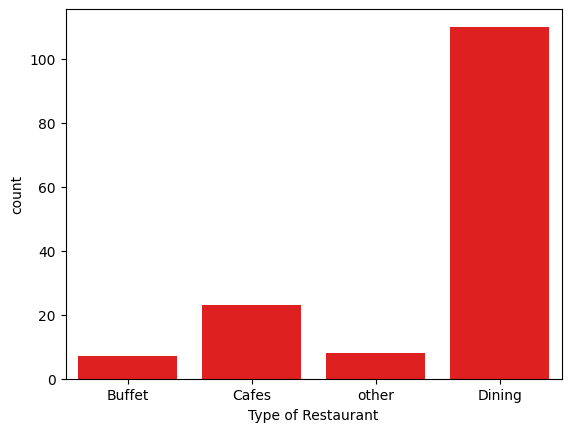

In [65]:
sns.countplot(x = DataFrame['listed_in(type)'], color = 'red')
plt.xlabel('Type of Restaurant')

### Conclusion :- Majority of the restaurant falls into Dining Category

## Therefore Dining Restaurants are preferred by the larger number of Customers 

# 2. How many votes has each type of restaurant received from customers ?

Text(0, 0.5, 'Count of Votes ')

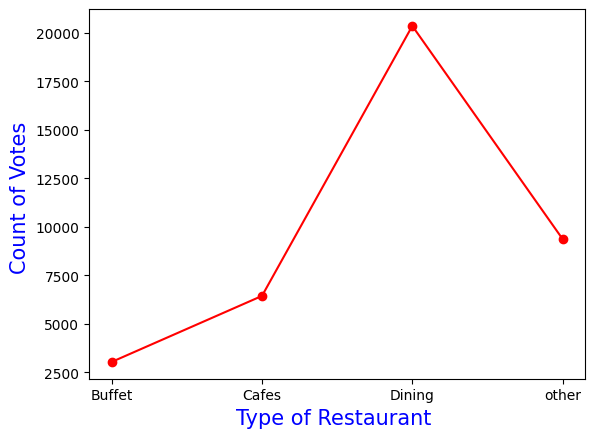

In [66]:
Grouped_data = DataFrame.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':Grouped_data})
plt.plot(result, color = 'red', marker = 'o')
plt.xlabel("Type of Restaurant ", color = 'Blue', size='15')
plt.ylabel("Count of Votes ", color = 'Blue', size='15')

### Conclusion :- Dining Category of the restaurant got the maximum number of Votes 

# 3. What are Majority of ratings restaurants have received ?

Text(0.5, 1.0, 'Maximum rating')

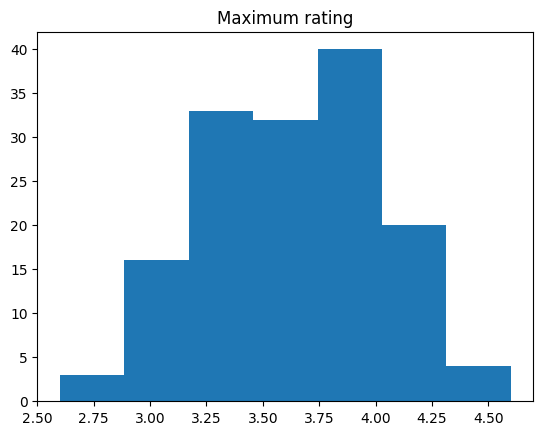

In [67]:
plt.hist(DataFrame['rate'], bins = 7)
plt.title("Maximum rating")

### Conclusion :- Maximum number of rating lies between 3.5 to 4 

# 4. Spending of couple on each order ?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

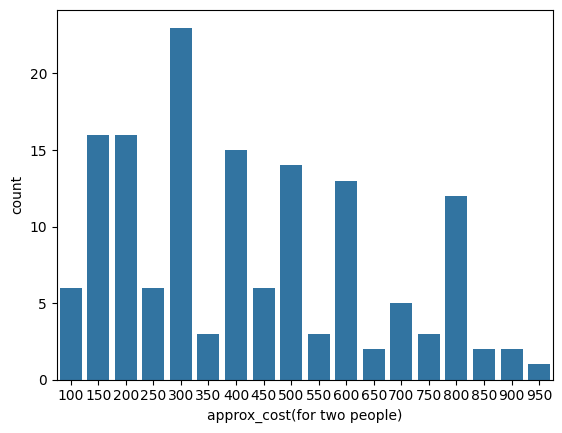

In [68]:
couple_data = DataFrame['approx_cost(for two people)']
sns.countplot(x = couple_data)

### Conclusion :- The Majority of couples prefer restaurants with an approximate cost of 300 rs

# 5. Which mode(online/offline) receives more rating ?

<Axes: xlabel='online_order', ylabel='rate'>

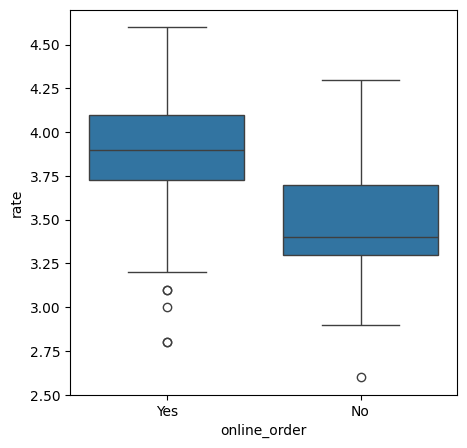

In [69]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'online_order', y= 'rate', data = DataFrame)

### Conclusion :- Online order receives more rating in comparison to offline orders

# 6. Which type of restaurant received more offline order ?

Text(0.5, 1.0, 'Heatmap')

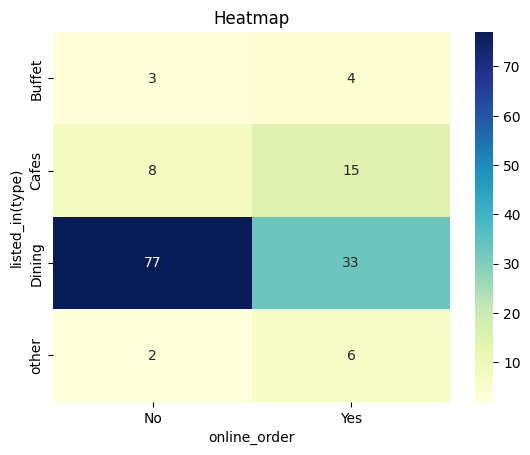

In [70]:
pivot_table = DataFrame.pivot_table(index= 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value= 0)
sns.heatmap(pivot_table,annot= True, cmap ="YlGnBu", fmt='d')
plt.title('Heatmap')

### Conclusion :- Dining Restaurants primarily receives offline order, whereas cafes primarily receives online order. This suggest client prefer to place orders in person at restaurant but prefer online ordering at cafes.